In [2]:
# ! pip install openpyxl
# ! pip install rdkit

In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdmolops
from rdkit.Chem import Descriptors

In [4]:
from rdkit.Chem import PandasTools
from IPython.core.display import HTML
PandasTools.RenderImagesInAllDataFrames(images=True)
pd.set_option('display.max_rows', 500)

In [5]:
# adapted from here https://kellerbits.net/wordpress/?p=326 great resource!!

#! python3 - Script1.py - Retrieve SMILES codes from PubChem API 

'''This script enables automatically connecting to the PubChem database, 
transfer of CAS numbers which are converted to CID identifiers
as first step and then resolved to respective SMILES codes.'''

# Import the library necessary for making a web service request.
from os import chdir
import urllib.request, urllib.error
import json
import time
import pandas as pd

# Define working directory

# Function for resolving given CAS number into CID. Therefore
# variables for PUG-REST request URL pieces are defined 
def name_to_cid(name):

    time.sleep(0)
    path_prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
    path_compound = '/compound/'
    path_name = 'name/'
    path_nameinput = name
    path_name_rest = '/cids/JSON'
    
    url = path_prolog + path_compound + path_name + path_nameinput + path_name_rest
# Make a PUG-REST request and store the output in "request"
    print('cas_to_cid:', url)
    try:
        request = urllib.request.urlopen(url)
    except urllib.error.HTTPError:
        print('HTTPError while requesting name', name)
        return ''
    
    # Give the output/reply back as JSON and return CID number from function
    if request is not None:
        reply = request.read()
        if reply is not None and len(reply) > 0:
            json_out = json.loads(reply)
            cid = json_out['IdentifierList']['CID'][0]
            return cid
    return ''

# Function for searching and extracting SMILES code with entering CID 
def cid_to_smiles(cid):
    
    time.sleep(0)
    path_prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
    path_compound = '/compound/'
    path_name = 'cid/'
    path_cid = str(cid)
    path_cid_rest = '/property/IsomericSMILES/JSON'
    
    url = path_prolog + path_compound + path_name + path_cid + path_cid_rest
        
    # Make a PUG-REST request and store the output in "request"
    print('cid_to_smiles:', url)
    try:
        request = urllib.request.urlopen(url)
    except urllib.error.HTTPError:
        print('HTTPError while requesting cid', cid)
        return ''
    
    # Give the reply in JSON format, access and return the SMILES code
    if request is not None:
        reply = request.read()
        if reply is not None and len(reply) > 0:
            json_out = json.loads(reply)
            #return json_out
            # smilescanonical = json_out['PropertyTable']['Properties'][0]['CanonicalSMILES']
            smilesisomeric = json_out['PropertyTable']['Properties'][0]['IsomericSMILES']
            return smilesisomeric
    return ''

# NOTE: to do this for many CAS numbers, iterate thru the given list and call above functions to 
# resolve to cid and, in turn, to SMILES. Sleep between each request to avoid overloading
# PubChem servers.

# Load list with CAS numbers where SMILES code is to be requested


In [6]:
#adapted from here https://greglandrum.github.io/rdkit-blog/posts/2022-12-23-descriptor-tutorial.html

def getMolDescriptors(mol, missingVal=None):
    ''' calculate the full list of descriptors for a molecule
    
        missingVal is used if the descriptor cannot be calculated
    '''
    res = {}
    for nm,fn in Descriptors._descList:
        # some of the descriptor functions can throw errors if they fail, catch those here:
        try:
            val = fn(mol)
        except:
            # print the error message:
            import traceback
            traceback.print_exc()
            # and set the descriptor value to whatever missingVal is
            val = missingVal
        res[nm] = val
    return res

In [7]:
# bb_df = pd.read_excel('aa_library_smiles.xlsx')
# display(bb_df)
# bb_df['cidsfromcas'] = [name_to_cid(name.replace(' ', '%20')) for name in bb_df['CAS']]
# bb_df['smiles'] = [cid_to_smiles(cid) for cid in bb_df['cidsfromcas']]
# display(bb_df)
# bb_df.to_excel('aa_library_smiles.xlsx')
name_to_cid('627-03-2')
cid_to_smiles('7478')

cas_to_cid: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/627-03-2/cids/JSON
cid_to_smiles: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/7478/property/IsomericSMILES/JSON


'COC1=CC=C(C=C1)C(=O)O'

In [8]:
# bb_df = pd.read_excel('aa_all_smiles.xlsx')
bb_df = pd.read_excel('aa_library_smiles.xlsx')
bb_df

,Unnamed: 0,Name,CAS,abb,cidsfromcas,smiles,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,0,Fmoc-L-Ala-OH,35661-39-3,A1,6364642,C[C@@H](C(=O)O)NC(=O)OCC1C2=CC=CC=C2C3=CC=CC=C13,NaN,NaN,NaN,NaN
1,1,Fmoc-Sar-OH,77128-70-2,A2,688640,CN(CC(=O)O)C(=O)OCC1C2=CC=CC=C2C3=CC=CC=C13,NaN,NaN,NaN,his
2,2,Fmoc-D-Ala-OH,79990-15-1,A3,2724627,C[C@H](C(=O)O)NC(=O)OCC1C2=CC=CC=C2C3=CC=CC=C13,NaN,NaN,NaN,NaN
3,3,Fmoc-N-Me-L-Ala-OH,84000-07-7,A4,688634,C[C@@H](C(=O)O)N(C)C(=O)OCC1C2=CC=CC=C2C3=CC=C...,NaN,NaN,NaN,NaN
4,4,Fmoc-L-Abu-OH,135112-27-5,A5,853016,CC[C@@H](C(=O)O)NC(=O)OCC1C2=CC=CC=C2C3=CC=CC=C13,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
566,566,NaN,496778-02-0,C353,1047854,C1CN(CCC1C(=O)O)S(=O)(=O)C2=CC=C(S2)Br,NaN,NaN,NaN,NaN
567,567,NaN,455267-56-8,C354,21864674,C1C(C1C(=O)O)C2=CC=CC=C2F,NaN,NaN,NaN,NaN
568,568,NaN,1723-27-9,C355,660319,C1=CSC2=C1SC(=C2)C(=O)O,NaN,NaN,NaN,NaN
569,569,NaN,66185-74-8,C356,202819,C1CC(CCC1CO)C(=O)O,NaN,NaN,NaN,NaN


In [9]:
aadict = {}

for idx, aa in enumerate(bb_df['abb']):
    aadict[aa] = bb_df['smiles'][idx]

aadict['1'] = 'SCCNC(OCC1C2=C(C3=C1C=CC=C3)C=CC=C2)=O'
aadict['2'] = 'SCCCNC(OCC1C2=C(C3=C1C=CC=C3)C=CC=C2)=O'
aadict['3'] = 'SCCCN(C)C(OCC1C2=C(C3=C1C=CC=C3)C=CC=C2)=O'
aadict['4'] = 'O=C(OCC1C2=C(C3=C1C=CC=C3)C=CC=C2)NC/C=C/CS'
aadict['5'] = 'O=C(OCC1C2=C(C3=C1C=CC=C3)C=CC=C2)N4CC(CS)C4'
aadict['6'] = 'O=C(OCC1C2=C(C3=C1C=CC=C3)C=CC=C2)N4CCC(S)CC4'
aadict['7'] = 'O=C(OCC1C2=C(C3=C1C=CC=C3)C=CC=C2)N4CCC(CS)CC4'

print(len(aadict))

aadict['C55']

578


'CCOCC(=O)O'

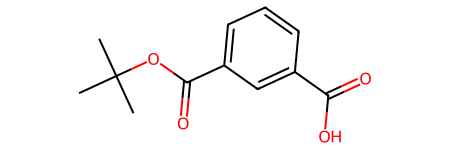

In [10]:
display(Chem.MolFromSmiles(aadict['C257']))

this is the sequence: N93 B1 D1 2
this is the CA: C257


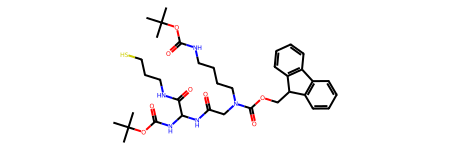

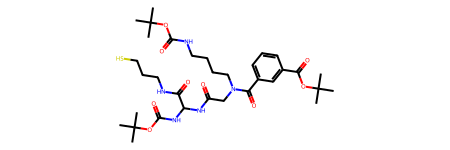

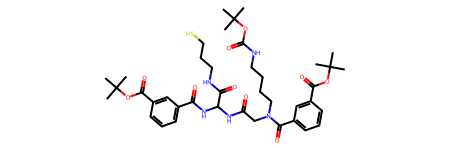

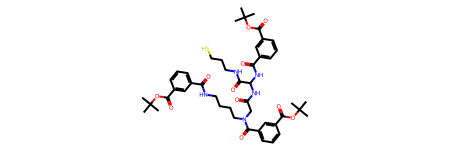

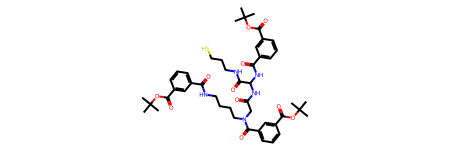

'CC(C)(C)OC(=O)C1=CC=CC(C(=O)NCCCCN(CC(=O)NC(NC(=O)C2=CC(C(=O)OC(C)(C)C)=CC=C2)C(=O)NCCCS)C(=O)C2=CC(C(=O)OC(C)(C)C)=CC=C2)=C1'

In [11]:
# print(Chem.MolToSmarts(Chem.MolFromSmiles('OC(C)=O')))
seq = 'N42 B1 D1 2'
ca = 'C11'

acylrxn = AllChem.ReactionFromSmarts('([#6]-[#6](-[#6])(-[#8]-[#6](-[N:1])=[#8])-[#6]).([#8;H1]-[#6:2]=[#8:3])>>[N:1]-[#6:2]=[#8:3]')
caprxn = AllChem.ReactionFromSmarts('([#8]=[#6](-[#7:1])-[#8]-[#6]-[#6]1-[#6]2:[#6](-[#6]3:[#6]-1:[#6]:[#6]:[#6]:[#6]:3):[#6]:[#6]:[#6]:[#6]:2)>>[N:1]-[#6](=[#8])-[#6]')
peprxn = AllChem.ReactionFromSmarts('([#8]=[#6](-[#7:1])-[#8]-[#6]-[#6]1-[#6]2:[#6](-[#6]3:[#6]-1:[#6]:[#6]:[#6]:[#6]:3):[#6]:[#6]:[#6]:[#6]:2).([#8:3]=[#6:2]-[OH])>>[#8:3]=[#6:2]-[#7:1]')
rxnpeptoid = AllChem.ReactionFromSmarts('([C:1]-[#35]).([Nh2:2]-[C,N:3])>>[C:1]-[N:2](-[C,N:3])(-[#6](=[#8])-[#8]-[#6]-[#6]1-[#6]2:[#6](-[#6]3:[#6]-1:[#6]:[#6]:[#6]:[#6]:3):[#6]:[#6]:[#6]:[#6]:2)')
fmoctoboc = AllChem.ReactionFromSmarts('[#8]=[#6](-[#7:1])-[#8]-[#6]-[#6]1-[#6]2:[#6](-[#6]3:[#6]-1:[#6]:[#6]:[#6]:[#6]:3):[#6]:[#6]:[#6]:[#6]:2>>[#6]-[#6](-[#6])(-[#8]-[#6](-[N:1])=[#8])-[#6]')

def acylation(seqraw, ca):
    seq = seqraw.split(' ')
    print('this is the sequence: ' + seqraw)
    print('this is the CA: ' + ca)
    seq.reverse()

    while('' in seq):
        seq.remove("")

    if ('-' in seq) or (len(seq)<2):
        return '-'
 
    else:

        product = Chem.MolFromSmiles(aadict[seq[0]])

        for aa in seq[1:]:
            # print(aa)
            
            reacts = (product,Chem.MolFromSmiles(aadict[aa]))
            products = peprxn.RunReactants(reacts) # tuple
            
            if len(products) == 0:
                products = rxnpeptoid.RunReactants(reacts)

            product = products[0][0]
            # display(product)
    display(product)
    if seqraw[0] == 'N':
        # print('amine in last position!')
        product = fmoctoboc.RunReactants((product,))[0][0]
    else:
        product = caprxn.RunReactants((product,))[0][0]

    camol = Chem.MolFromSmiles(aadict[ca])

    n = 1
    while product.HasSubstructMatch(Chem.MolFromSmarts('[#6]-[#6](-[#6])(-[#8]-[#6](-[N])=[#8])-[#6]')):
        reacts = (product, camol)
        products = acylrxn.RunReactants(reacts) # tuple
        product = products[0][0]
        # print('Number of CA addition: ' + str(n))
        display(product)
        n += 1
    # display(product)
    smile = Chem.MolToSmiles(product, kekuleSmiles = True)
    # product = Chem.MolFromSmiles(smile)
    display(product)
    return smile

# acylation(seq, ca)
# smile = acylation('N93 B1 D1 A16 A19 A52 A22 2', 'C257')
acylation('N93 B1 D1 2','C257')

this is the sequence: N93 B1 D1 A16 A19 A52 A22 A24 A65 2
this is the CA: C257


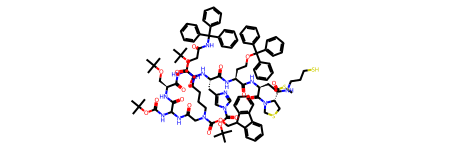

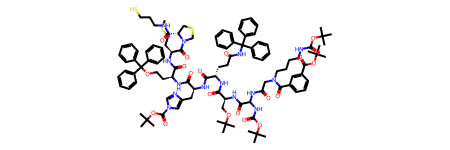

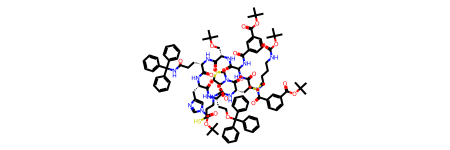

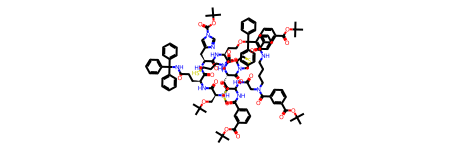

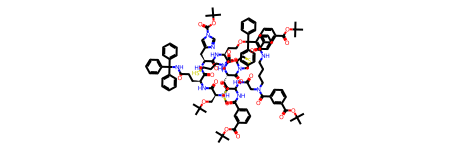

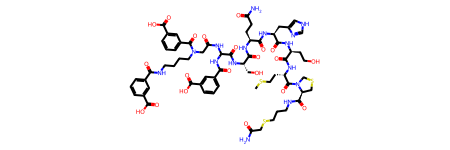

'CSCC[C@H](NC(=O)[C@H](CCO)NC(=O)[C@H](CC1=CNC=N1)NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](CO)NC(=O)C(NC(=O)CN(CCCCNC(=O)C1=CC=CC(C(=O)O)=C1)C(=O)C1=CC=CC(C(=O)O)=C1)NC(=O)C1=CC=CC(C(=O)O)=C1)C(=O)N1CSC[C@H]1C(=O)NCCCSCC(N)=O'

In [12]:
def removepgs(smile):
    mol = Chem.MolFromSmiles(smile)


    capthiol = AllChem.ReactionFromSmarts('[S;H1:1]>>[S:1]-[#6]-[#6](=[#8])-[#7]')
    mol = capthiol.RunReactants((mol,))[0][0]

    # boc = '[#6]-[#6](-[#6])(-[#8]-[#6](-[#7])=[#8])-[#6]'
    # tbu = '[#6]-[#6](-[#6])(-[#8])-[#6]'
    # trt = '[#8]-[#6](-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1)(-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1)-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1'

    products = ['dummy']

    while len(products) != 0:
        
        products = []

        removetrt = AllChem.ReactionFromSmarts('[#8,#7:1]-[#6](-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1)(-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1)-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1>>[#8,#7:1]')
        
        mols = removetrt.RunReactants((mol,))
        if len(mols) != 0:
            products.append(mols)

        removeboc = AllChem.ReactionFromSmarts('([#6]-[#6](-[#6])(-[#8]-[#6](-[#7:1])=[#8])-[#6])>>[#7H:1]')
        mols = removeboc.RunReactants((mol,))
        if len(mols) != 0:
            products.append(mols)

        mol = Chem.MolFromSmiles((Chem.MolToSmiles(mol)))
        removetbu = AllChem.ReactionFromSmarts('[#6;H3]-[#6](-[#6;H3])(-[#8:1])-[#6;H3]>>[#8:1]')
        mols = removetbu.RunReactants((mol,))
        if len(mols) != 0:
            products.append(mols)

        # print(products)
        if len(products) != 0:
            mol = products[0][0][0]
            # display(mol)
    display(mol)
    smile = Chem.MolToSmiles(mol, kekuleSmiles = True)

    return smile

removepgs(acylation('N93 B1 D1 A16 A19 A52 A22 A24 A65 2', 'C257'))
# 'this is the sequence: D28 A36 A55 N39 B2 2'
# 'this is the CA: C11'

# removepgs(acylation('D28 A36 A55 N39 B2 2', 'C289'))

In [25]:

# print(Chem.MolToSmarts(Chem.MolFromSmiles('OC(C)=O')))
seq = 'N42 B1 D1 2'
ca = 'C11'

acylrxn = AllChem.ReactionFromSmarts('([#6]-[#6](-[#6])(-[#8]-[#6](-[N:1])=[#8])-[#6]).([#8;H1,O-]-[#6:2]=[#8:3])>>[N:1]-[#6:2]=[#8:3]')
caprxn = AllChem.ReactionFromSmarts('([#8]=[#6](-[#7:1])-[#8]-[#6]-[#6]1-[#6]2:[#6](-[#6]3:[#6]-1:[#6]:[#6]:[#6]:[#6]:3):[#6]:[#6]:[#6]:[#6]:2)>>[N:1]-[#6](=[#8])-[#6]')
peprxn = AllChem.ReactionFromSmarts('([#8]=[#6](-[#7:1])-[#8]-[#6]-[#6]1-[#6]2:[#6](-[#6]3:[#6]-1:[#6]:[#6]:[#6]:[#6]:3):[#6]:[#6]:[#6]:[#6]:2).([#8:3]=[#6:2]-[OH])>>[#8:3]=[#6:2]-[#7:1]')
rxnpeptoid = AllChem.ReactionFromSmarts('([C:1]-[#35]).([Nh2:2]-[C,N:3])>>[C:1]-[N:2](-[C,N:3])(-[#6](=[#8])-[#8]-[#6]-[#6]1-[#6]2:[#6](-[#6]3:[#6]-1:[#6]:[#6]:[#6]:[#6]:3):[#6]:[#6]:[#6]:[#6]:2)')
fmoctoboc = AllChem.ReactionFromSmarts('[#8]=[#6](-[#7:1])-[#8]-[#6]-[#6]1-[#6]2:[#6](-[#6]3:[#6]-1:[#6]:[#6]:[#6]:[#6]:3):[#6]:[#6]:[#6]:[#6]:2>>[#6]-[#6](-[#6])(-[#8]-[#6](-[N:1])=[#8])-[#6]')

def all(seqraw, ca):
    seq = seqraw.split(' ')
    print('this is the sequence: ' + seqraw)
    print('this is the CA: ' + ca)
    seq.reverse()

    while('' in seq):
        seq.remove("")

    if ('-' in seq) or (len(seq)<2):
        return '-'
 
    else:

        mol = Chem.MolFromSmiles(aadict[seq[0]])

        for aa in seq[1:]:
            # print(aa)
            
            reacts = (mol,Chem.MolFromSmiles(aadict[aa]))
            products = peprxn.RunReactants(reacts) # tuple
            
            if len(products) == 0:
                products = rxnpeptoid.RunReactants(reacts)

            mol = products[0][0]
            # display(product)
    # display(mol)
    if seqraw[0] == 'N':
        # print('amine in last position!')
        mol = fmoctoboc.RunReactants((mol,))[0][0]
    else:
        mol = caprxn.RunReactants((mol,))[0][0]

    # boc = '[#6]-[#6](-[#6])(-[#8]-[#6](-[#7])=[#8])-[#6]'
    # tbu = '[#6]-[#6](-[#6])(-[#8])-[#6]'
    # trt = '[#8]-[#6](-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1)(-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1)-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1'

    products = ['dummy']

    while len(products) != 0:
        
        products = []

        removetrt = AllChem.ReactionFromSmarts('[#8,#7:1]-[#6](-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1)(-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1)-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1>>[#8,#7:1]')
        
        mols = removetrt.RunReactants((mol,))
        if len(mols) != 0:
            products.append(mols)

        removeboc = AllChem.ReactionFromSmarts('([#6]-[#6](-[#6])(-[#8]-[#6](-[n:1])=[#8])-[#6])>>[nH:1]')
        mols = removeboc.RunReactants((mol,))
        if len(mols) != 0:
            products.append(mols)

        mol = Chem.MolFromSmiles((Chem.MolToSmiles(mol)))
        removetbu = AllChem.ReactionFromSmarts('[#6;H3]-[#6](-[#6;H3])(-[#8:1]-[c,Ch:2])-[#6;H3]>>[#8:1]-[c,Ch:2]')
        mols = removetbu.RunReactants((mol,))
        if len(mols) != 0:
            products.append(mols)

        # print(products)
        if len(products) != 0:
            mol = products[0][0][0]
            # display(mol)


    camol = Chem.MolFromSmiles(aadict[ca])

    n = 1
    while mol.HasSubstructMatch(Chem.MolFromSmarts('[#6]-[#6](-[#6])(-[#8]-[#6](-[N])=[#8])-[#6]')):
        # display(mol)
        # display(camol)
        reacts = (mol, camol)
        products = acylrxn.RunReactants(reacts) # tuple
        mol = products[0][0]
        # print('Number of CA addition: ' + str(n))
        # display(mol)
        n += 1
    # display(product)
    smile = Chem.MolToSmiles(mol, kekuleSmiles = True)

    mol = Chem.MolFromSmiles(smile)


    capthiol = AllChem.ReactionFromSmarts('[S;H1:1]>>[S:1]-[#6]-[#6](=[#8])-[#7]')
    mol = capthiol.RunReactants((mol,))[0][0]


    # display(mol)
    smile = Chem.MolToSmiles(mol, kekuleSmiles = True)
    
    return(smile)

seq = 'N42 B1 D1 2'
ca = 'C257'
# all(seq, ca)

# removepgs(acylation('N93 B1 D1 A16 A19 A52 A22 A24 A65 2', 'C257'))
# 'this is the sequence: D28 A36 A55 N39 B2 2'
# 'this is the CA: C11'
# all('D28 A36 A55 N39 B2 2', 'C289')
# all('A19 N93 B1 D1 A52 A16 2', 'C346')
all('A43 D29 A7 N73 B5 2', 'C147')

this is the sequence: A43 D29 A7 N73 B5 2
this is the CA: C147


'CC(=O)N[C@@H](CC1=CC=C(O)C=C1)C(=O)N[C@H](CC1=CC(CNC(=O)C[N+](C)(C)C)=CC=C1)C(=O)N[C@H](C(=O)N(CCC1=CC=C(Cl)C=C1)CC1=CC(C(=O)NCCCSCC(N)=O)=CC=C1)C(C)C'

In [41]:
# seq = 'D5 A7 N1 B5 2'
# mols = []
# molsname = []

# #
# for i in range(1000):
#     try:
#         camol = Chem.MolFromSmiles(aadict['C' + str(i)])
#         # display(camol)
#     except:
#         print('ca C' + str(i) + ' does not exist')
#         continue
#     # print('im still here ' + str(i))
#     smiles = all(seq, 'C'+str(i))
#     molsname.append('C'+str(i))
#     molsname.append(seq + ' C' + str(i))
#     mols.append(camol)
#     mols.append(Chem.MolFromSmiles(smiles))

# seq = 'D5 A7 N1 B5 2'
# ca = 'C1'
# mols = []
# molsname = []

# for i in range(1000):
#     try:
#         camol = Chem.MolFromSmiles(aadict['C' + str(i)])
#         # display(camol)
#     except:
#         print('ca C' + str(i) + ' does not exist')
#         continue
#     # print('im still here ' + str(i))
#     smiles = all(seq, 'C'+str(i))
#     molsname.append('C'+str(i))
#     molsname.append(seq + ' C' + str(i))
#     mols.append(camol)
#     mols.append(Chem.MolFromSmiles(smiles))

In [42]:
acyldf = pd.read_excel('acylation.xlsx')
acyldf

,Peptide number in synthesis,384 Well-Plate,Well,Sequence,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,seqs,Peptide number in synthesis.1,...,1536-Well plate 14,1536-Well plate 15,1536-Well plate 16,1536-Well plate 17,1536-Well plate 18,1536-Well plate 19,1536-Well plate 20,1536-Well plate 21,1536-Well plate 22,1536-Well plate 23
0,1,1,A1,D27,A58,A61,N42,B1,D27 A58 A61 N42 B1 2,1,...,C25,C40,C248,C262,C275,C290,C76,C43,C331,C346
1,2,1,B1,D1,A26,A1,N31,B1,D1 A26 A1 N31 B1 2,2,...,C25,C40,C248,C262,C275,C290,C76,C43,C331,C346
2,3,1,C1,D4,A22,A3,N47,B1,D4 A22 A3 N47 B1 2,3,...,C25,C40,C248,C262,C275,C290,C76,C43,C331,C346
3,4,1,D1,D8,A73,A52,N60,B1,D8 A73 A52 N60 B1 2,4,...,C25,C40,C248,C262,C275,C290,C76,C43,C331,C346
4,5,1,E1,D20,A63,A35,N64,B1,D20 A63 A35 N64 B1 2,5,...,C25,C40,C248,C262,C275,C290,C76,C43,C331,C346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,1532,4,L24,N7,B7,A23,A43,D3,N7 B7 A23 A43 D3 2,1532,...,C39,C247,C261,C60,C289,C303,C316,C330,C345,C211
1532,1533,4,M24,N72,B7,A5,A11,D10,N72 B7 A5 A11 D10 2,1533,...,C39,C247,C261,C60,C289,C303,C316,C330,C345,C211
1533,1534,4,N24,N48,B7,A64,A68,D13,N48 B7 A64 A68 D13 2,1534,...,C39,C247,C261,C60,C289,C303,C316,C330,C345,C211
1534,1535,4,O24,N63,B7,A45,A59,D11,N63 B7 A45 A59 D11 2,1535,...,C39,C247,C261,C60,C289,C303,C316,C330,C345,C211


In [43]:
# for i in range(1,24):
#     acyldf['smiles_%s' %str(i)] = acyldf[['seqs', '1536-Well plate %s' %str(i)]].apply(lambda x: removepgs(acylation(x[0], x[1])), axis = 1)
for i in range(1,24):
    acyldf['smiles_%s' %str(i)] = acyldf[['seqs', '1536-Well plate %s' %str(i)]].apply(lambda x: all(x[0], x[1]), axis = 1)

this is the sequence: D27 A58 A61 N42 B1 2
this is the CA: C11
this is the sequence: D1 A26 A1 N31 B1 2
this is the CA: C11
this is the sequence: D4 A22 A3 N47 B1 2
this is the CA: C11
this is the sequence: D8 A73 A52 N60 B1 2
this is the CA: C11
this is the sequence: D20 A63 A35 N64 B1 2
this is the CA: C11
this is the sequence: D27 A70 A64 N63 B1 2
this is the CA: C11
this is the sequence: D19 A33 A38 N33 B1 2
this is the CA: C11
this is the sequence: D10 A28 A10 N8 B1 2
this is the CA: C11
this is the sequence: D4 A51 A74 N25 B1 2
this is the CA: C11
this is the sequence: D5 A46 A24 N54 B1 2
this is the CA: C11
this is the sequence: D5 A30 A44 N53 B1 2
this is the CA: C11
this is the sequence: D2 A61 A71 N26 B1 2
this is the CA: C11
this is the sequence: D18 A35 A23 N32 B1 2
this is the CA: C11
this is the sequence: D26 A75 A4 N56 B1 2
this is the CA: C11
this is the sequence: D28 A67 A31 N23 B1 2
this is the CA: C11
this is the sequence: D20 A43 A33 N16 B1 2
this is the CA: C11
thi

In [44]:
acyldf.to_excel('smiles.xlsx')

In [16]:
# import itertools as it

# truncs = []
# for i in range(4):
#     x = it.combinations(range(4),i+1)
#     for s in list(x):
#         truncs.append(s)
# truncs

In [17]:
# seq = 'ca_114 ar_a_p0_20 al_a_p0_133 ar_a_p1_311' #2

# seqs = []
# smiles = []

# for i in truncs:
#     seq_t = ''
#     for e in i:
#         print(e)
#         seq_t += ' ' + seq.split(' ')[e]
#     seq_t = seq_t + ' 2' #add resin bc no truncations without resin are possible
#     smile = build_peptide(seq_t)
#     seqs.append(seq_t)
#     smiles.append(smile)

In [18]:
# products = pd.DataFrame(data={'trunc seq': seqs, 'smiles': smiles})
# # products['mol'] = [Chem.MolFromSmiles(smile) for smile in products['smiles']]
# products['em'] = [getMolDescriptors(Chem.MolFromSmiles(product))['ExactMolWt'] for product in products['smiles']]
# products = products.sort_values(by='em')
# products['mol'] = [Chem.MolFromSmiles(product) for product in products['smiles']]
# products

In [19]:
# products.smiles[6]